In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import chardet

with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result['encoding'])

Windows-1252


In [3]:
df = pd.read_csv('spam.csv', encoding='Windows-1252')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1223,ham,Rofl betta invest in some anti aging products,NaN,NaN,NaN
4878,ham,Yeah just open chat and click friend lists. Th...,NaN,NaN,NaN
1529,ham,Should I have picked up a receipt or something...,NaN,NaN,NaN
483,ham,Thank you baby! I cant wait to taste the real ...,NaN,NaN,NaN
5089,ham,What type of stuff do you sing?,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# 1. Data Cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

### 1. Data Cleaning

In [8]:
# drop last three cols

df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
# renaming cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [10]:
df.sample(5)

,target,text
2724,ham,Nope... C Ì_ then...
5433,ham,You're gonna have to be way more specific than...
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...
4029,ham,"Cool, I'll text you in a few"
3466,spam,URGENT! We are trying to contact U. Todays dra...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head() 

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicated
df.drop_duplicates(keep = 'first', inplace=True)
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### 2. EDA

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

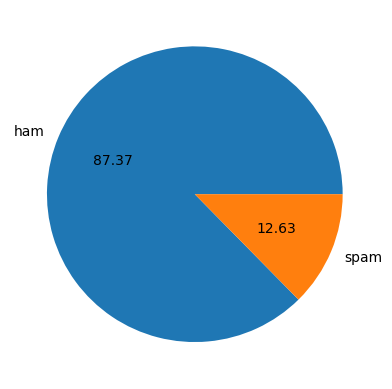

In [19]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [20]:
# data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kunal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_chars'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_chars', 'num_words', 'num_sentences']].groupby(df['target']).describe()

num_chars                                                           \
           count        mean        std   min    25%    50%    75%    max   
target                                                                      
0         4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
1          653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

       num_words             ...              num_sentences            \
           count       mean  ...   75%    max         count      mean   
target                       ...                                        
0         4516.0  16.957484  ...  22.0  219.0        4516.0  1.815545   
1          653.0  27.474732  ...  32.0   44.0         653.0  2.969372   

                                            
             std  min  25%  50%  75%   max  
target                                      
0       1.364098  1.0  1.0  1.0  2.0  38.0  
1       1.488910  1.0  2.0  3.0  4.0   9.0  

[2 rows x 24 columns]

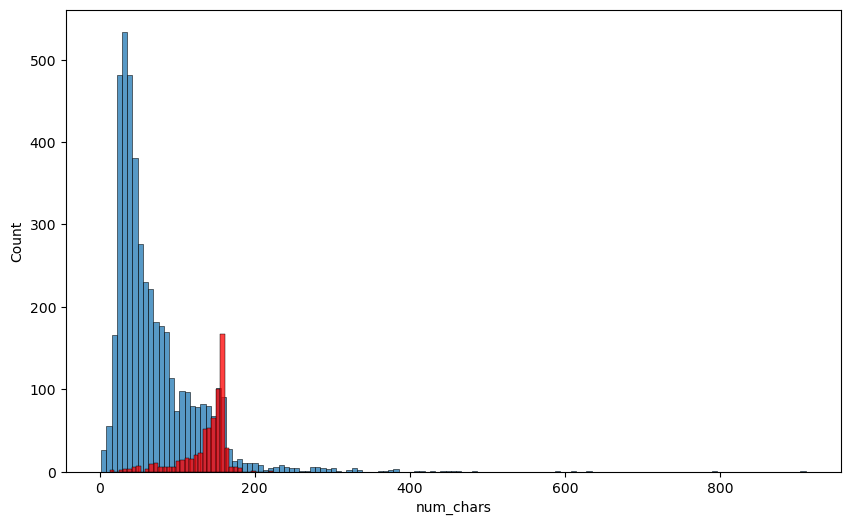

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'], color='red') #spam
plt.show()

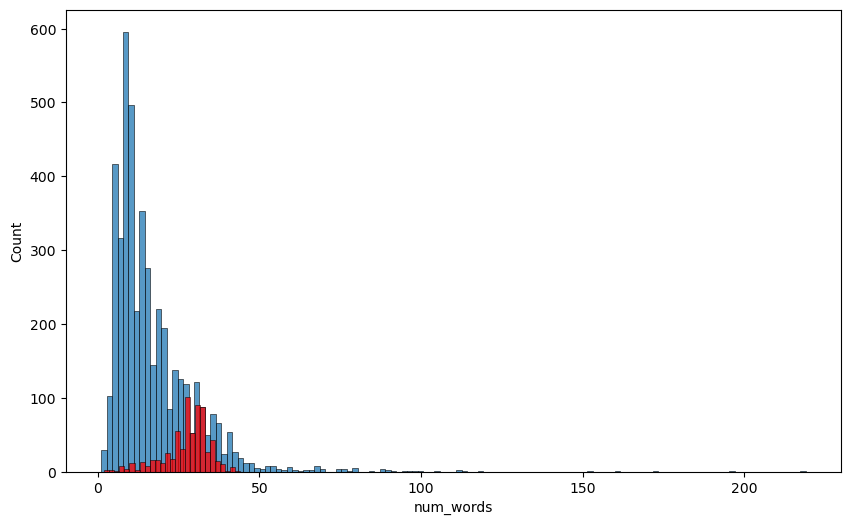

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red') #spam
plt.show()

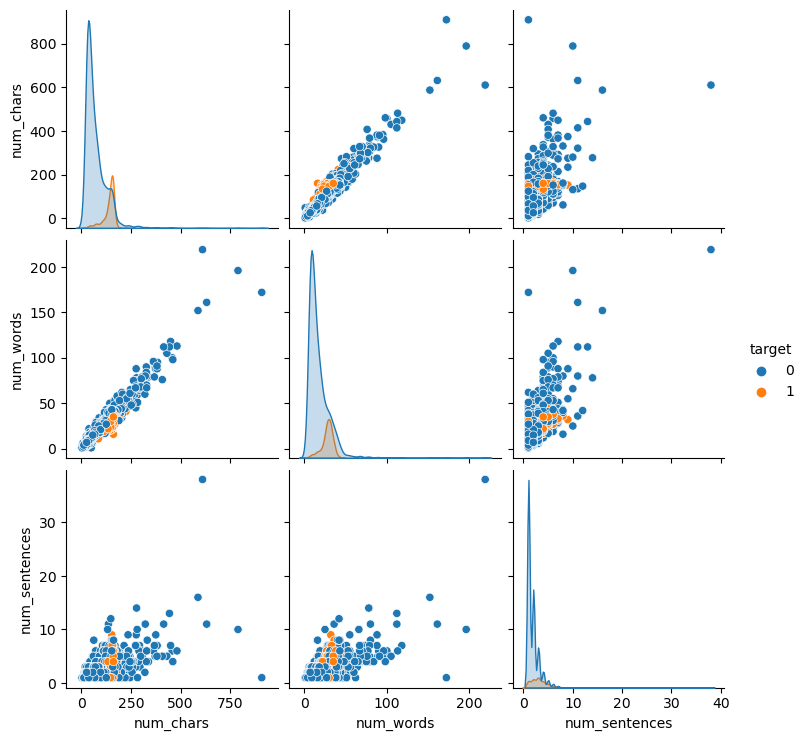

In [32]:
sns.pairplot(df, hue='target')

[]

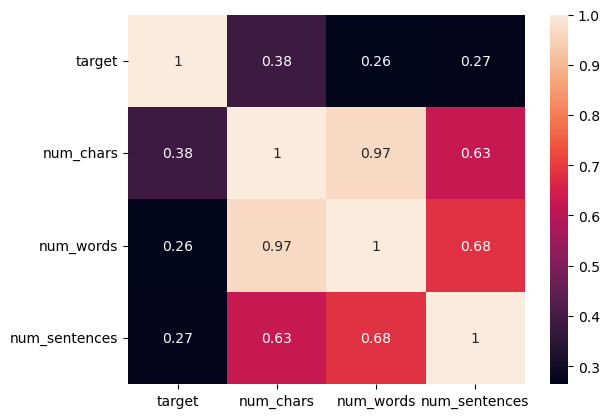

In [33]:
sns.heatmap(df.corr(), annot=True)
plt.plot()

In [34]:
# from the above graph it is clear that there is a very high collinearity between the num_chars, num_words and num_sentences, thus we will take only one column out of these.
# we will be choosing cum_chars because it has the greatest relation with target out of the two num_words and num_sentences

### 3. Data Preprocessing
- Lower Case
- Tokenization
- removing special characters
- removing stop words and pucntuation
- stemming

In [35]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [36]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    ps = PorterStemmer()
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
              
    return " ".join(y)

In [37]:
print(transform_text('HI how are you doing> and keeping up?'))

hi keep


In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'

# Create a WordCloud object
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path  # Specify the font path here
)

In [41]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word) 

len(spam_corpus)
        

9883

In [43]:
from collections import Counter
most_common = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Counts'])
most_common

,Word,Counts
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


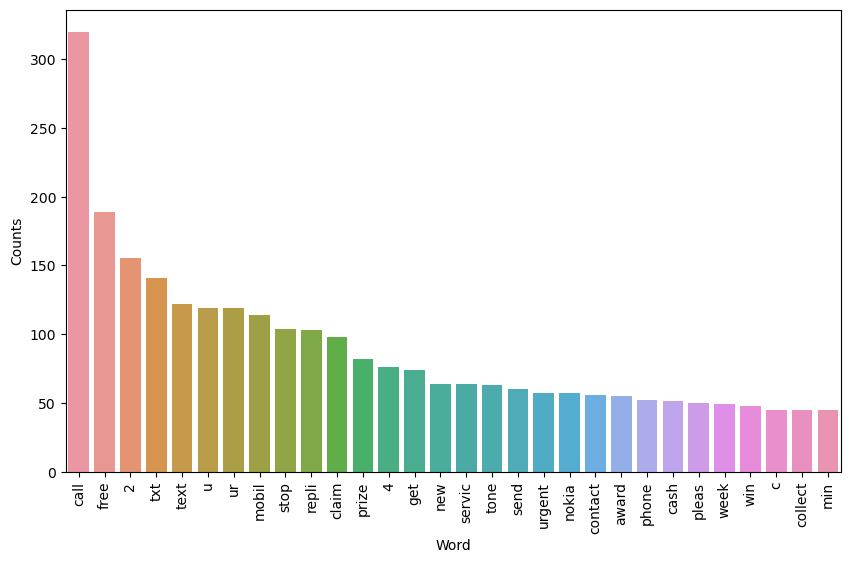

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data = most_common, x = 'Word', y = 'Counts')
plt.xticks(rotation  = 'vertical')
plt.show()

In [45]:
df

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [46]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text']:
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns = ['Words', 'Counts'])

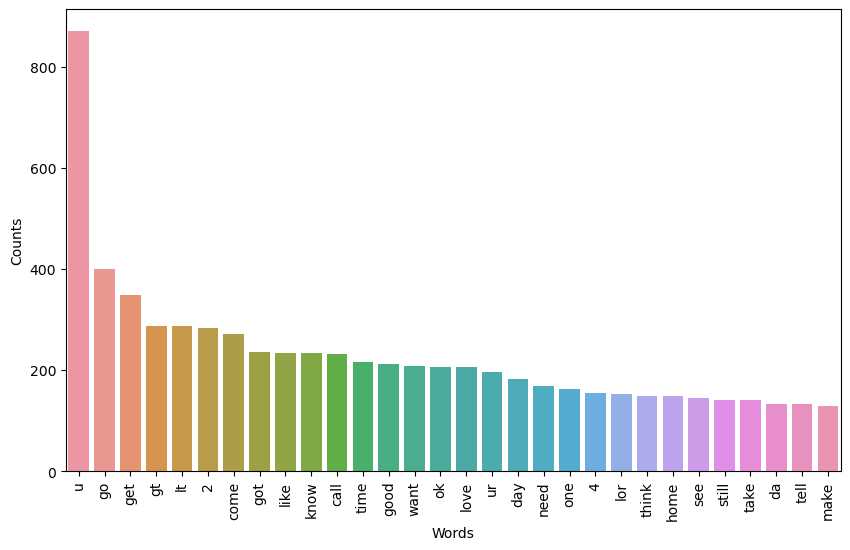

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(data = most_common_ham, x = 'Words', y = 'Counts')
plt.xticks(rotation = 'vertical')
plt.show()

### 4. Model Building

In [49]:
# Bag of Words - CountVectorizer
# Tfid - TfidVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [50]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5169, 3000)


In [51]:
y = df['target'].values
y


array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB")
print('Accuracy_score for Gaussian NB: ', accuracy_score(y_test, y_pred1))
print('Confusion Matrix for Gaussian NB: ', confusion_matrix(y_test, y_pred1))
print('Precision Score for Gaussian NB: ', precision_score(y_test, y_pred1))
print('-'*100)


mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MultinomialNB")
print('Accuracy_score for Multinomial NB: ', accuracy_score(y_test, y_pred2))
print('Confusion Matrix for Multinomial NB: ', confusion_matrix(y_test, y_pred2))
print('Precision Score for Multinomial NB: ', precision_score(y_test, y_pred2))
print('-'*100)


bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("BernoulliNB")
print('Accuracy_score for Bernoulli NB: ', accuracy_score(y_test, y_pred3))
print('Confusion Matrix for Bernoulli NB: ', confusion_matrix(y_test, y_pred3))
print('Precision Score for Bernoulli NB: ', precision_score(y_test, y_pred3))

GaussianNB
Accuracy_score for Gaussian NB:  0.867504835589942
Confusion Matrix for Gaussian NB:  [[785 111]
 [ 26 112]]
Precision Score for Gaussian NB:  0.5022421524663677
----------------------------------------------------------------------------------------------------
MultinomialNB
Accuracy_score for Multinomial NB:  0.9729206963249516
Confusion Matrix for Multinomial NB:  [[896   0]
 [ 28 110]]
Precision Score for Multinomial NB:  1.0
----------------------------------------------------------------------------------------------------
BernoulliNB
Accuracy_score for Bernoulli NB:  0.9816247582205029
Confusion Matrix for Bernoulli NB:  [[895   1]
 [ 18 120]]
Precision Score for Bernoulli NB:  0.9917355371900827


In [57]:
# choosing TFIDF with MNB, as precision is coming good

In [58]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))